In [1]:
%load_ext autoreload
%autoreload 1


In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, median_absolute_error
import warnings

from computage.utils.data_utils import download_meta, download_dataset
from computage.utils.nan_utils import EN_nan_row_predict,introduce_nans

from computage.models_library.model import LinearMethylationModel

In [3]:
import pandas as pd
import gzip

# with gzip.open('GSE132203.pkl.gz','rb')as f_in:
#     with open('GSE132203.pkl', 'wb') as f_out:
#         f_out.write(f_in.read())

df = pd.read_pickle('GSE132203.pkl.gz')

In [4]:
data = pd.DataFrame(df['data'])
#data = data.T #For current model
X = data
X

,cg00000029,cg00000103,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM3853125,0.592053,0.987501,0.983161,0.985858,0.992408,0.095346,0.906290,0.842573,0.959729,0.820245,...,0.457500,0.004700,0.418612,0.996515,0.514862,0.003187,0.003969,0.553545,0.996854,0.000028
GSM3853126,0.542467,0.936105,0.986668,0.994086,0.989934,0.040725,0.931498,0.790361,0.848165,0.873644,...,0.991988,0.997563,0.008240,0.510967,0.034542,0.498871,0.997551,0.574740,0.477447,0.684898
GSM3853127,0.466598,0.982851,0.988104,0.976208,0.989469,0.067267,0.956232,0.788661,0.995650,0.857318,...,0.995488,0.002135,0.940510,0.506133,0.028268,0.007293,0.997384,0.529805,0.984310,0.604418
GSM3853128,0.582700,0.962205,0.988590,0.983156,0.988471,0.129559,0.900303,0.833435,0.994962,0.891568,...,0.495350,0.998950,0.000078,0.998765,0.951552,0.003511,0.595721,0.060715,0.995005,0.999416
GSM3853129,0.586890,0.986249,0.967364,0.979459,0.997209,0.101187,0.914853,0.801992,0.930908,0.907765,...,0.476436,0.001291,0.007983,0.002722,0.532058,0.991973,0.996531,0.546266,0.994391,0.999619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3853915,0.551843,0.995657,0.946689,0.970678,0.991711,0.123204,0.941749,0.792590,0.935450,0.905648,...,0.002583,0.376560,0.394963,0.520089,0.517883,0.005252,0.978751,0.058207,0.997415,0.628106
GSM3853916,0.507195,0.996997,0.973939,0.545064,0.984198,0.236184,0.817581,0.952306,0.944585,0.913471,...,0.394404,0.406817,0.018008,0.529650,0.030415,0.989340,0.988657,0.945338,0.992372,0.662327
GSM3853917,0.651166,0.997574,0.974010,0.978316,0.985891,0.054668,0.927333,0.903286,0.986233,0.906635,...,0.437773,0.002168,0.012281,0.497557,0.467319,0.001854,0.991306,0.541269,0.994817,0.999235
GSM3853918,0.479801,0.955905,0.948228,0.973159,0.972671,0.113712,0.869281,0.658921,0.775979,0.939672,...,0.002633,0.381972,0.933089,0.524908,0.029076,0.587137,0.988791,0.532903,0.497377,0.712618


In [5]:
meta = pd.DataFrame(df['meta'])
y = pd.DataFrame(meta['Age'])
y = y.rename(columns={'Age': 'age'})
#y_test = y
#y_test
y

,age
GSM3853125,49.0
GSM3853126,21.0
GSM3853127,44.0
GSM3853128,51.0
GSM3853129,52.0
...,...
GSM3853915,33.0
GSM3853916,52.0
GSM3853917,24.0
GSM3853918,20.0


In [6]:
meta_hc = meta[meta['Condition']=='HC']

In [7]:
meta[meta['Condition']!='HC']
# в этом датасете все здоровые

,Title,Tissue,CellType,Gender,Age,Ethnicity,Condition,_Merged_caps_and_pss_within_30_days,_tei_total_types_experienced_somewitness,_childabphyssexemot_ctq_01modandsev,_CD4Tcells(%),_NKcells(%),_Bcells(%),_Monocytes(%),_Neutrophiles(%),Platform


In [8]:
model_1 = LinearMethylationModel(name="PhenoAge2018")

In [9]:
X_nas = introduce_nans(X)
X_nas

,cg00000029,cg00000103,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM3853125,NaN,0.987501,0.983161,NaN,0.992408,0.095346,0.906290,0.842573,0.959729,0.820245,...,0.457500,0.004700,0.418612,0.996515,0.514862,0.003187,0.003969,0.553545,0.996854,0.000028
GSM3853126,NaN,0.936105,NaN,0.994086,0.989934,0.040725,0.931498,0.790361,0.848165,0.873644,...,0.991988,0.997563,0.008240,0.510967,0.034542,0.498871,0.997551,0.574740,NaN,0.684898
GSM3853127,0.466598,0.982851,0.988104,0.976208,NaN,0.067267,0.956232,NaN,0.995650,0.857318,...,NaN,NaN,0.940510,0.506133,0.028268,0.007293,0.997384,0.529805,0.984310,0.604418
GSM3853128,0.582700,0.962205,0.988590,0.983156,0.988471,0.129559,0.900303,0.833435,0.994962,0.891568,...,0.495350,0.998950,0.000078,0.998765,0.951552,0.003511,0.595721,0.060715,NaN,0.999416
GSM3853129,0.586890,0.986249,0.967364,NaN,0.997209,0.101187,0.914853,0.801992,0.930908,0.907765,...,NaN,0.001291,0.007983,0.002722,0.532058,0.991973,0.996531,NaN,0.994391,0.999619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3853915,0.551843,0.995657,0.946689,0.970678,0.991711,0.123204,0.941749,NaN,0.935450,0.905648,...,0.002583,0.376560,0.394963,0.520089,0.517883,0.005252,0.978751,0.058207,0.997415,0.628106
GSM3853916,0.507195,0.996997,0.973939,0.545064,0.984198,0.236184,0.817581,0.952306,0.944585,0.913471,...,0.394404,0.406817,0.018008,0.529650,0.030415,0.989340,NaN,0.945338,0.992372,0.662327
GSM3853917,0.651166,0.997574,0.974010,0.978316,0.985891,0.054668,0.927333,0.903286,0.986233,0.906635,...,0.437773,0.002168,0.012281,0.497557,0.467319,0.001854,0.991306,NaN,0.994817,0.999235
GSM3853918,0.479801,0.955905,0.948228,0.973159,0.972671,0.113712,0.869281,0.658921,0.775979,0.939672,...,0.002633,0.381972,0.933089,0.524908,0.029076,0.587137,0.988791,NaN,0.497377,0.712618


In [10]:
X

,cg00000029,cg00000103,cg00000109,cg00000155,cg00000158,cg00000165,cg00000221,cg00000236,cg00000289,cg00000292,...,rs7746156,rs798149,rs845016,rs877309,rs9292570,rs9363764,rs939290,rs951295,rs966367,rs9839873
GSM3853125,0.592053,0.987501,0.983161,0.985858,0.992408,0.095346,0.906290,0.842573,0.959729,0.820245,...,0.457500,0.004700,0.418612,0.996515,0.514862,0.003187,0.003969,0.553545,0.996854,0.000028
GSM3853126,0.542467,0.936105,0.986668,0.994086,0.989934,0.040725,0.931498,0.790361,0.848165,0.873644,...,0.991988,0.997563,0.008240,0.510967,0.034542,0.498871,0.997551,0.574740,0.477447,0.684898
GSM3853127,0.466598,0.982851,0.988104,0.976208,0.989469,0.067267,0.956232,0.788661,0.995650,0.857318,...,0.995488,0.002135,0.940510,0.506133,0.028268,0.007293,0.997384,0.529805,0.984310,0.604418
GSM3853128,0.582700,0.962205,0.988590,0.983156,0.988471,0.129559,0.900303,0.833435,0.994962,0.891568,...,0.495350,0.998950,0.000078,0.998765,0.951552,0.003511,0.595721,0.060715,0.995005,0.999416
GSM3853129,0.586890,0.986249,0.967364,0.979459,0.997209,0.101187,0.914853,0.801992,0.930908,0.907765,...,0.476436,0.001291,0.007983,0.002722,0.532058,0.991973,0.996531,0.546266,0.994391,0.999619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3853915,0.551843,0.995657,0.946689,0.970678,0.991711,0.123204,0.941749,0.792590,0.935450,0.905648,...,0.002583,0.376560,0.394963,0.520089,0.517883,0.005252,0.978751,0.058207,0.997415,0.628106
GSM3853916,0.507195,0.996997,0.973939,0.545064,0.984198,0.236184,0.817581,0.952306,0.944585,0.913471,...,0.394404,0.406817,0.018008,0.529650,0.030415,0.989340,0.988657,0.945338,0.992372,0.662327
GSM3853917,0.651166,0.997574,0.974010,0.978316,0.985891,0.054668,0.927333,0.903286,0.986233,0.906635,...,0.437773,0.002168,0.012281,0.497557,0.467319,0.001854,0.991306,0.541269,0.994817,0.999235
GSM3853918,0.479801,0.955905,0.948228,0.973159,0.972671,0.113712,0.869281,0.658921,0.775979,0.939672,...,0.002633,0.381972,0.933089,0.524908,0.029076,0.587137,0.988791,0.532903,0.497377,0.712618


In [11]:
type(X_nas)

pandas.core.frame.DataFrame

In [12]:
X.index

Index(['GSM3853125', 'GSM3853126', 'GSM3853127', 'GSM3853128', 'GSM3853129',
       'GSM3853130', 'GSM3853131', 'GSM3853132', 'GSM3853133', 'GSM3853134',
       ...
       'GSM3853910', 'GSM3853911', 'GSM3853912', 'GSM3853913', 'GSM3853914',
       'GSM3853915', 'GSM3853916', 'GSM3853917', 'GSM3853918', 'GSM3853919'],
      dtype='object', length=795)

In [14]:
model_1.features

array(['cg15611364', 'cg17605084', 'cg26382071', 'cg12743894',
       'cg19287114', 'cg12985418', 'cg19398783', 'cg15963417',
       'cg27187881', 'cg09892203', 'cg00943950', 'cg18996776',
       'cg16340918', 'cg23832061', 'cg22736354', 'cg04084157',
       'cg07265300', 'cg02503970', 'cg11426590', 'cg23710218',
       'cg02802055', 'cg13631913', 'cg06493994', 'cg24304712',
       'cg01131735', 'cg24208206', 'cg01930621', 'cg19104072',
       'cg07850604', 'cg27493997', 'cg14281160', 'cg12247247',
       'cg08331960', 'cg17726022', 'cg19722847', 'cg21801378',
       'cg03977782', 'cg03929796', 'cg01254459', 'cg09548179',
       'cg09556292', 'cg17896249', 'cg26091688', 'cg17009433',
       'cg06690548', 'cg26815229', 'cg15447479', 'cg27015931',
       'cg13550877', 'cg05492270', 'cg22594309', 'cg08896629',
       'cg11237115', 'cg04736140', 'cg06533629', 'cg25881193',
       'cg03535648', 'cg27367952', 'cg11600161', 'cg19345165',
       'cg15881088', 'cg21296230', 'cg14175438', 'cg134

In [15]:
from computage.models_library.definitions import *
name = "PhenoAge2018"
model_file_path = get_clock_file(name)
model_data = pd.read_csv(model_file_path)
features = model_data[['Feature_ID']][1:]
coefficients = np.array(model_data[['Coef']][1:])
featuress = features['Feature_ID'].values
featuress

array(['cg15611364', 'cg17605084', 'cg26382071', 'cg12743894',
       'cg19287114', 'cg12985418', 'cg19398783', 'cg15963417',
       'cg27187881', 'cg09892203', 'cg00943950', 'cg18996776',
       'cg16340918', 'cg23832061', 'cg22736354', 'cg04084157',
       'cg07265300', 'cg02503970', 'cg11426590', 'cg23710218',
       'cg02802055', 'cg13631913', 'cg06493994', 'cg24304712',
       'cg01131735', 'cg24208206', 'cg01930621', 'cg19104072',
       'cg07850604', 'cg27493997', 'cg14281160', 'cg12247247',
       'cg08331960', 'cg17726022', 'cg19722847', 'cg21801378',
       'cg03977782', 'cg03929796', 'cg01254459', 'cg09548179',
       'cg09556292', 'cg17896249', 'cg26091688', 'cg17009433',
       'cg06690548', 'cg26815229', 'cg15447479', 'cg27015931',
       'cg13550877', 'cg05492270', 'cg22594309', 'cg08896629',
       'cg11237115', 'cg04736140', 'cg06533629', 'cg25881193',
       'cg03535648', 'cg27367952', 'cg11600161', 'cg19345165',
       'cg15881088', 'cg21296230', 'cg14175438', 'cg134

In [35]:
modelX_ = X.reindex(columns=model_1.features)
modelX_

,cg15611364,cg17605084,cg26382071,cg12743894,cg19287114,cg12985418,cg19398783,cg15963417,cg27187881,cg09892203,...,cg15642326,cg27244482,cg00083937,cg22395019,cg17923358,cg17861230,cg08212685,cg12373771,cg00503840,cg15381313
GSM3853125,0.004725,0.015026,0.011719,0.011136,0.014649,0.023327,0.013951,0.004377,0.071365,0.008994,...,0.209446,0.650532,0.641623,0.041228,0.076750,0.278200,NaN,0.145603,0.139111,0.923218
GSM3853126,0.001701,0.012174,0.003642,0.013024,0.008125,0.010531,0.013515,0.001870,0.077025,0.012327,...,0.201895,0.789583,0.593864,0.033091,0.049761,0.165017,NaN,0.065505,0.093643,0.984493
GSM3853127,0.004267,0.014230,0.006141,0.010507,0.014991,0.009138,0.007016,0.009746,0.083039,0.013820,...,0.197430,0.821485,0.659944,0.070802,0.057472,0.351867,NaN,0.154375,0.136258,0.893825
GSM3853128,0.004254,0.007853,0.007509,0.009013,0.010133,0.015317,0.019303,0.013890,0.084294,0.008097,...,0.202503,0.807932,0.703426,0.045047,0.106545,0.299976,NaN,0.139338,0.182560,0.973547
GSM3853129,0.017859,0.011603,0.003544,0.007231,0.008555,0.011430,0.015097,0.006331,0.124611,0.005332,...,0.241096,0.787579,0.598265,0.058432,0.106205,0.204296,NaN,0.076897,0.148893,0.960586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3853915,0.013440,0.012242,0.006342,0.011432,0.015326,0.016064,0.013759,0.037545,0.079830,0.016819,...,0.218521,0.792896,0.563146,0.063130,0.078336,0.249306,NaN,0.082397,0.095285,0.957043
GSM3853916,0.002514,0.018204,0.003640,0.010307,0.010267,0.010578,0.007355,0.013050,0.096568,0.011916,...,0.159732,0.810264,0.658166,0.041593,0.068581,0.410986,NaN,0.172795,0.101522,0.953139
GSM3853917,0.005598,0.012933,0.002491,0.007410,0.015213,0.018702,0.009064,0.020480,0.093126,0.009930,...,0.199467,0.716073,0.593754,0.049571,0.079435,0.245636,NaN,0.080933,0.120236,0.960930
GSM3853918,0.008175,0.011789,0.003491,0.008384,0.018920,0.019649,0.011413,0.019520,0.064514,0.004494,...,0.214898,0.772603,0.583487,0.024783,0.037478,0.145579,NaN,0.046440,0.060263,0.946374


In [22]:
y_pred_test = model_1.predict(X_)

In [23]:
y_pred_test

,0
GSM3853125,44.626481
GSM3853126,22.517485
GSM3853127,57.155682
GSM3853128,47.778853
GSM3853129,47.822494
...,...
GSM3853915,28.713752
GSM3853916,46.120843
GSM3853917,21.498157
GSM3853918,11.303242


In [24]:
y

,age
GSM3853125,49.0
GSM3853126,21.0
GSM3853127,44.0
GSM3853128,51.0
GSM3853129,52.0
...,...
GSM3853915,33.0
GSM3853916,52.0
GSM3853917,24.0
GSM3853918,20.0


In [25]:
nan_pct = np.linspace(0, 0.9, 19)
#nan_pct = [0.1]
X_test = X
y_test = y

mae_uie = []
r2_uie = []

for p in nan_pct:
    X_nan = introduce_nans(X_test, p)
    #X_nan = X_nas
    y_pred_test = model_1.predict(X_nan)
    
    
    
    mae_uie.append(median_absolute_error(y_test, y_pred_test))
    r2_uie.append(r2_score(y_test, y_pred_test))
    

In [28]:
mae_avg = []
r2_avg = []
model_2 = LinearMethylationModel(name="PhenoAge2018", imputation='average')
for p in nan_pct:
    X_nan = introduce_nans(X_test, p)
    #X_nan = X_nas
    y_pred_test = model_2.predict(X_nan )
    
    
    
    mae_avg.append(median_absolute_error(y_test, y_pred_test))
    r2_avg.append(r2_score(y_test, y_pred_test))

In [29]:
mae_ses = []
r2_ses = []
model_3 = LinearMethylationModel(name="PhenoAge2018", imputation='sesame_450k')
for p in nan_pct:
    X_nan = introduce_nans(X_test, p)
    #X_nan = X_nas
    y_pred_test = model_3.predict(X_nan )
    
    
    
    mae_ses.append(median_absolute_error(y_test, y_pred_test))
    r2_ses.append(r2_score(y_test, y_pred_test))

In [33]:
r2_ses

[0.30284082269739443,
 -0.7725398863703887,
 -1.4377689784409693,
 -2.696564099788596,
 -3.6392363570708914,
 -4.032499988253029,
 -4.430119929857789,
 -5.1901792922290415,
 -5.1319151951215165,
 -5.779638677927693,
 -5.934754873006512,
 -6.376889079620348,
 -6.142552996326839,
 -6.060831520990137,
 -6.131816252018773,
 -5.237747122799776,
 -5.646979743763584,
 -4.732877374628233,
 -3.5508171202708807]

# надо как-то внесение нанов сделать быстрее?

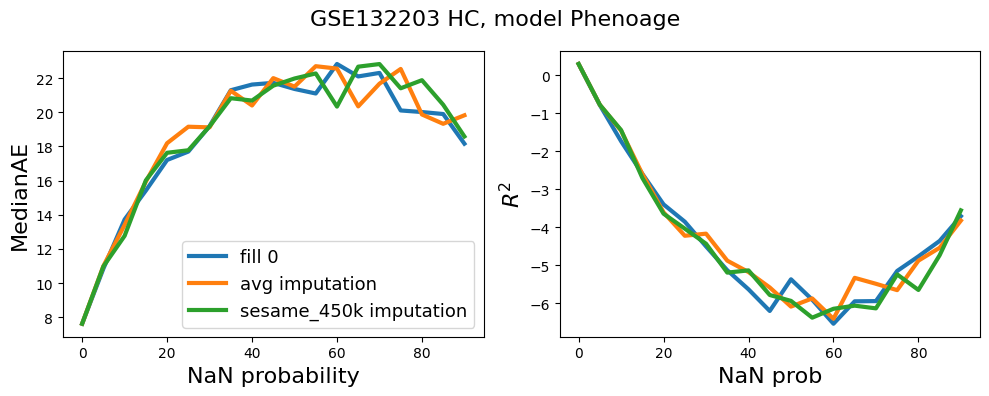

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle(f'GSE132203 HC, model Phenoage', fontsize=16)
ax[0].plot(nan_pct*100, mae_uie, lw=3, label='fill 0')
ax[0].plot(nan_pct*100, mae_avg, lw =3, label = 'avg imputation')
ax[0].plot(nan_pct*100, mae_ses, lw =3, label = 'sesame_450k imputation')
ax[1].plot(nan_pct*100, r2_uie, lw=3)
ax[1].plot(nan_pct*100, r2_avg, lw = 3)
ax[1].plot(nan_pct*100, r2_ses, lw = 3)


ax[0].set_xlabel('NaN probability', fontsize=16)
ax[1].set_xlabel('NaN prob', fontsize=16)
ax[0].set_ylabel('MedianAE', fontsize=16)
ax[1].set_ylabel('$R^2$', fontsize=16)
ax[0].legend(fontsize=13)
#ax[1].set_ylim([-0.5, 1.0])
plt.tight_layout()
plt.show()